<a href="https://colab.research.google.com/github/aklnt/BSBI_Foundamental_Of_Data/blob/main/FDA_Assignment_Phase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
from google.colab import files
uploaded = files.upload()

Saving SocialMedia_Dataset.csv to SocialMedia_Dataset.csv


In [14]:
df = pd.read_csv('SocialMedia_Dataset.csv')

In [15]:
df.head()

,User_ID,Device,Profession,Age,Daily_Minutes_Spent,Posts_Per_Day,Likes_Per_Day,Follows_Per_Day
0,U_1,Android,Software Engineer,43,288,16,94,0
1,U_2,Android,Manager,42,192,14,117,15
2,U_3,IOS,Marketer Manager,44,351,13,120,48
3,U_4,IOS,Manager,44,21,20,117,8
4,U_5,Android,Software Engineer,37,241,16,9,21


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   User_ID              1000 non-null   object
 1   Device               1000 non-null   object
 2   Profession           998 non-null    object
 3   Age                  1000 non-null   int64 
 4   Daily_Minutes_Spent  1000 non-null   int64 
 5   Posts_Per_Day        1000 non-null   int64 
 6   Likes_Per_Day        1000 non-null   int64 
 7   Follows_Per_Day      1000 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 62.6+ KB


In [17]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values Per Column:\n", missing_values)

# Fill missing numeric values with the median
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Fill missing categorical values with the most frequent value (mode)
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

print("Missing values after handling:\n", df.isnull().sum())

Missing Values Per Column:
 User_ID                0
Device                 0
Profession             2
Age                    0
Daily_Minutes_Spent    0
Posts_Per_Day          0
Likes_Per_Day          0
Follows_Per_Day        0
dtype: int64
Missing values after handling:
 User_ID                0
Device                 0
Profession             0
Age                    0
Daily_Minutes_Spent    0
Posts_Per_Day          0
Likes_Per_Day          0
Follows_Per_Day        0
dtype: int64


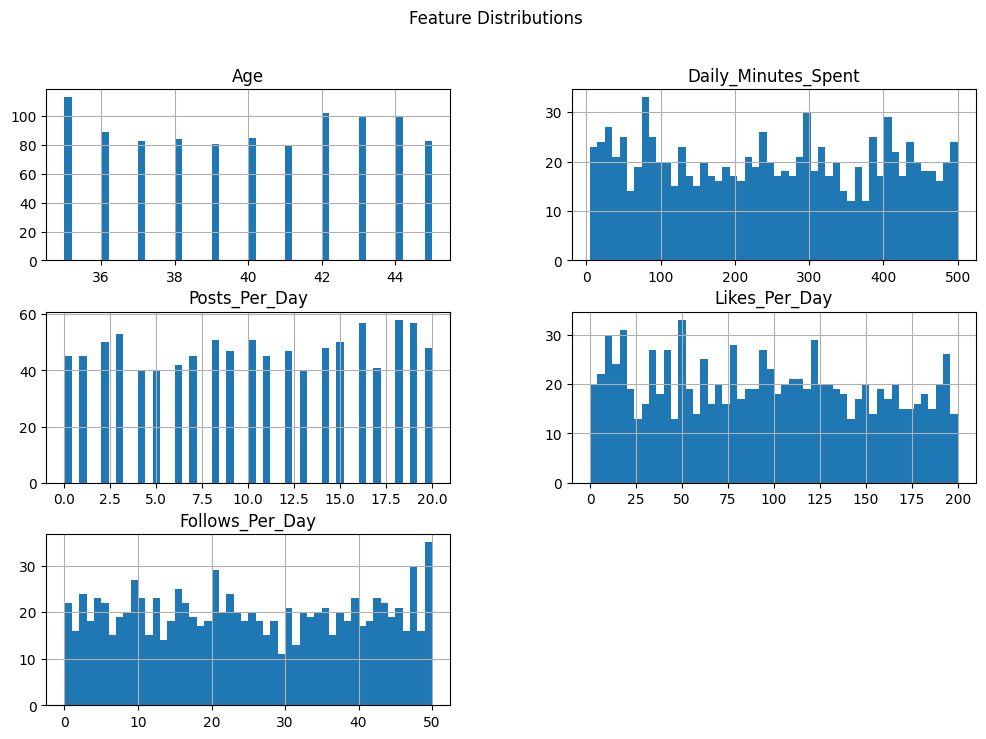

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

num_features = df.select_dtypes(include=['number']).columns

df[num_features].hist(figsize=(12, 8), bins=50)
plt.suptitle("Feature Distributions")
plt.show()

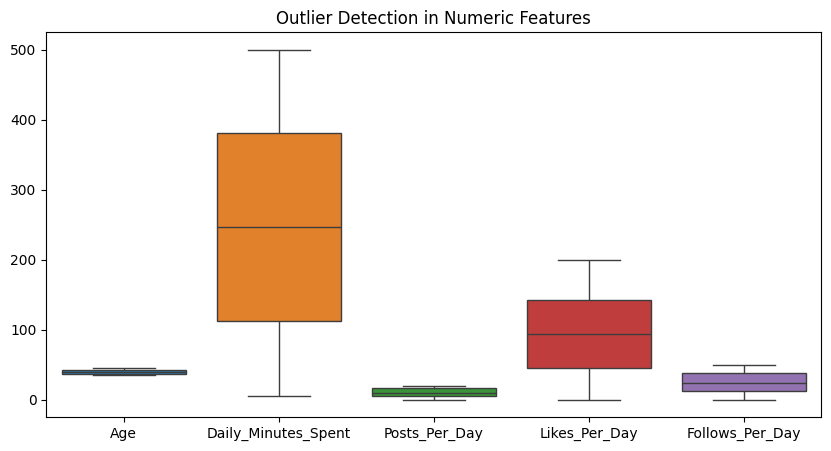

In [21]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[num_features])
plt.title("Outlier Detection in Numeric Features")
plt.show()

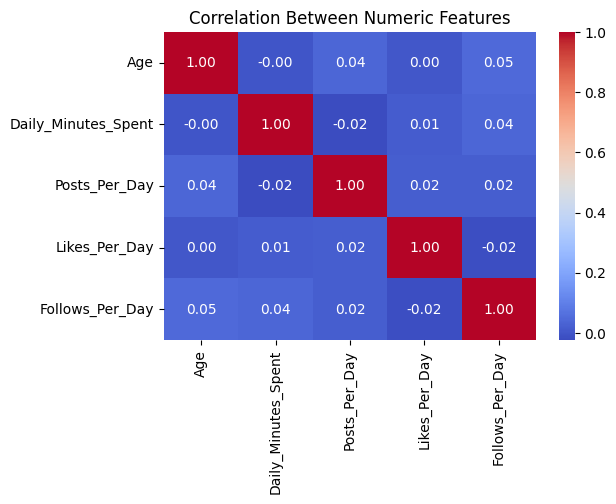

In [19]:
correlation_matrix = df[num_features].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Numeric Features")
plt.show()